### Surface Division
This notebook shows two examples of surface division with two typical sweeping lines (vertical lines and arcs).

In [1]:
import open3d as o3d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 150
from SurfaceDivision import MorseArc, MorseD

### Arcuate sweeping line

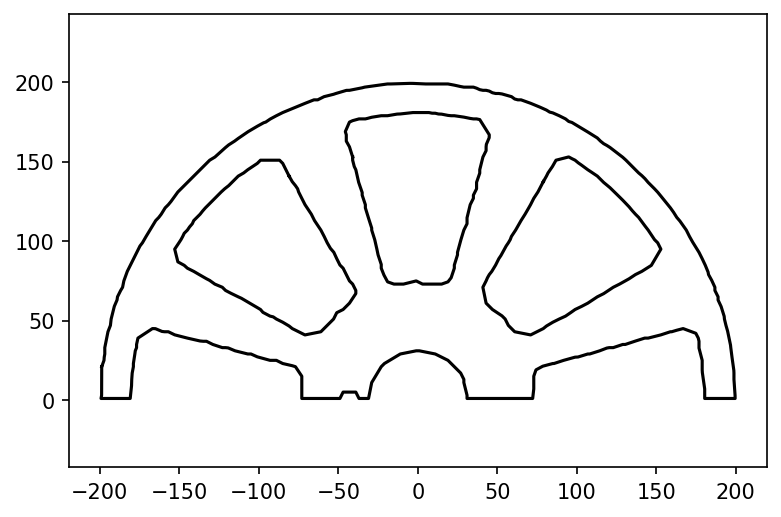

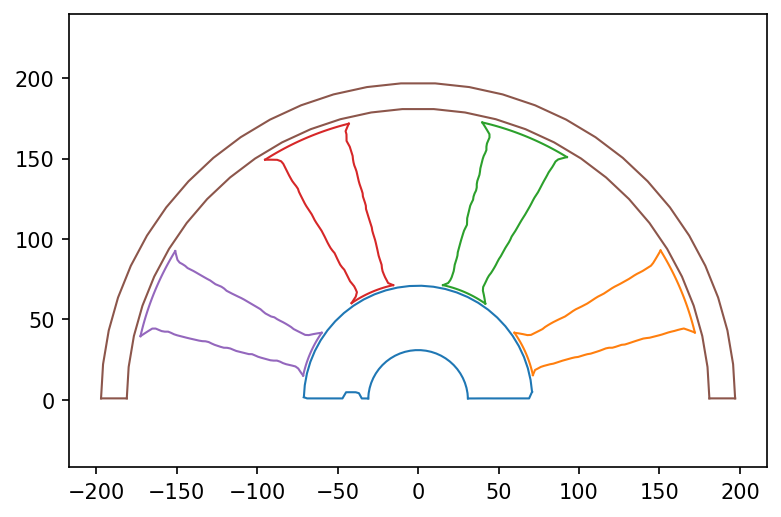

In [4]:
#import model
pcd = o3d.io.read_point_cloud("Wheel_upper_surface.ply")
pcd.normalize_normals()
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
        size=100, origin=[0,0,0])
points = np.asarray(pcd.points)
normals = np.asarray(pcd.normals)
new_tri_set = np.load('new_tri_set.npy')

# tri_set after alpha_shape
final_contour = np.load('final_contour.npy',allow_pickle= True)

# plot the contour
final_contour = list(final_contour)
points_yz = points[:,:2]
# plt.triplot(points_yz[:,0],points_yz[:,1],new_tri_set)
final_contour_points = []
for i in range(len(final_contour)):
    x = [points_yz[j][0] for j in final_contour[i]]
    y = [points_yz[j][1] for j in final_contour[i]]
    final_contour_points.append([x,y])
    plt.plot(x,y,color = 'k')
plt.axis('equal')
plt.show()

# convert the cartesian system into polar system
bound_y = [np.min(points_yz[:,0]), np.max(points_yz[:,0])]
bound_z = [np.min(points_yz[:,1]), np.max(points_yz[:,1])]
center = np.asarray([0,0])
final_contour_points_polar = []
contour_bounds_polar = []
for i in range(len(final_contour)):
    r = [np.linalg.norm(points_yz[index,:] - center) for index in final_contour[i]]
    theta = [np.arctan2((points_yz[index,:] - center)[1],(points_yz[index,:] - center)[0]) for index in final_contour[i]]
    final_contour_points_polar.append([r,theta])
    contour_bounds_polar.append([np.min(r),np.max(r),np.min(theta),np.max(theta)])

# calculate the boundary
ta = np.asarray(contour_bounds_polar)
r_min = np.min(ta[:,0])
r_max = np.max(ta[:,1])

# Surface Division
sets= MorseArc(final_contour_points_polar, contour_bounds_polar, [r_min,r_max], 2)
n_sets = len(sets)
for i in range(n_sets):
    if len(sets[n_sets-1-i][0]) <= 1:
        sets.pop(n_sets-1-i)

# plot 
n=30
for i in range(len(sets)):
    y1 = [center[0]+sets[i][0][index]*np.cos(sets[i][1][index]) for index in range(len(sets[i][0]))]
    z1 = [center[1]+sets[i][0][index]*np.sin(sets[i][1][index]) for index in range(len(sets[i][0]))]
    y2 = [center[0]+sets[i][0][index]*np.cos(sets[i][2][index]) for index in range(len(sets[i][0]))]
    z2 = [center[1]+sets[i][0][index]*np.sin(sets[i][2][index]) for index in range(len(sets[i][0]))]
#     plt.scatter(y1+y2,z1+z2,s = 5, color = color)
    p = plt.plot(y1,z1,linewidth = 1)
    color = p[0].get_color()
    plt.plot(y2,z2,linewidth = 1,color = color)
    r1 = sets[i][0][0]
    r2 = sets[i][0][-1]
    theta1i = sets[i][1][0]
    theta1a = sets[i][2][0]
    theta2i = sets[i][1][-1]
    theta2a = sets[i][2][-1]
    if theta1a < theta1i:
        theta1a += np.pi*2
    if theta2a < theta2i:
        theta2a += np.pi*2
    angle1 = np.linspace(theta1i,theta1a,n)
    angle2 = np.linspace(theta2i,theta2a,n)
    arc1 = [center[0]+r1*np.cos(angle1),center[1]+r1*np.sin(angle1)]
    arc2 = [center[0]+r2*np.cos(angle2),center[1]+r2*np.sin(angle2)]
    plt.plot(arc1[0], arc1[1], color = color, linewidth = 1)
    plt.plot(arc2[0], arc2[1], color = color, linewidth = 1)
        
plt.axis('equal')
plt.show()

# plot_arcs
for i in range(len(final_contour)):
    x, y = final_contour_points[i]
    plt.plot(x,y,color = 'k',linewidth = 1)
plt.axis('equal')

n=30
for i in range(len(line_set)):
    [new_path, l, sf, clock ] = path_arc(line_set[i])
    r, theta = new_path
    pre_point = None
    for j in range(int(len(r)/2)):
        index = 2*j
        tr = r[index]
        theta1 = theta[index]
        theta2 = theta[index+1]
        if clock[index] == 1:
            if theta2 - theta1 != 0:
                if theta1 > theta2:
                    theta2 += np.pi*2
                angle = np.arange(theta1,theta2+(theta2-theta1)/(n+1), (theta2-theta1)/n)
            else:
                angle = theta1
        elif clock[index] == -1:
            if theta2 - theta1 != 0:
                if theta1 < theta2:
                    theta2 -= np.pi*2
                angle = np.arange(theta1,theta2+(theta2-theta1)/(n+1), (theta2-theta1)/n)
            else:
                angle = theta1
        arc = [center[0]+tr*np.cos(angle),center[1]+tr*np.sin(angle)]
        plt.plot(arc[0], arc[1], color = color[i], linewidth = 1)
        cur_point_s = np.asarray([tr*np.cos(theta1), tr*np.sin(theta1)])
        cur_point_f = np.asarray([tr*np.cos(theta2), tr*np.sin(theta2)])
        if pre_point is not None:
            plt.plot([pre_point[0], cur_point_s[0]], [pre_point[1], cur_point_s[1]], color = color[i], linewidth = 1)
        pre_point = cur_point_f
        
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.show()

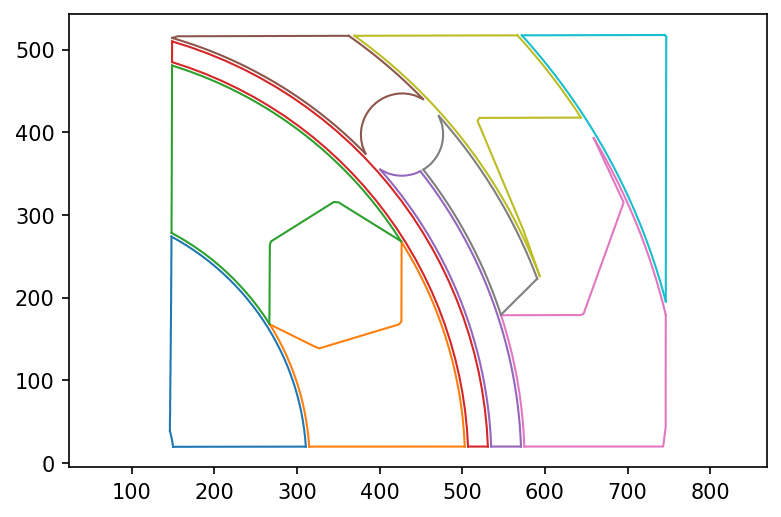

In [2]:
# Another example
final_contour_points = []
qu = [[-200,-200,400,400,-200],[-200,300,300,-200,-200]]
q1 = [[-80,-80,0,80,80,-20,-80],[-50,50,100,50,-50,-80,-50]]
c = [80,180]
angle = np.linspace(0,2*np.pi,50)
r = 50
x = c[0]+r*np.cos(angle)
y = c[1]+r*np.sin(angle)
q2 = [list(x),list(y)]
q3 = [[200,300,350,300,170,250,200],[-40,-40,100,200,200,10,-40]]

bias = np.asarray([[350],[220]])
qu = np.asarray(qu)+bias
qu = [list(qu[0,:]),list(qu[1,:])]
q1 = np.asarray(q1)+bias
q1 = [list(q1[0,:]),list(q1[1,:])]
q2 = np.asarray(q2)+bias
q2 = [list(q2[0,:]),list(q2[1,:])]
q3 = np.asarray(q3)+bias
q3 = [list(q3[0,:]),list(q3[1,:])]

# contour points
final_contour_points = [qu,q1,q2,q3]
for i in range(len(final_contour_points)):
    tf = [[],[]]
    for j in range(len(final_contour_points[i][0])):
        if j != len(final_contour_points[i][0])-1:
            x = [final_contour_points[i][0][j],final_contour_points[i][0][j+1]]
            y = [final_contour_points[i][1][j],final_contour_points[i][1][j+1]]
        else:
            x = [final_contour_points[i][0][j],final_contour_points[i][0][0]]
            y = [final_contour_points[i][1][j],final_contour_points[i][1][0]]
        tx = np.linspace(x[0],x[1],30)
        ty = np.linspace(y[0],y[1],30)
        tf[0] = tf[0]+list(tx)
        tf[1] = tf[1]+list(ty)
    final_contour_points[i] = tf

# polar system
final_contour_points_polar = []
contour_bounds_polar=[]
for i in range(len(final_contour_points)):
    temp = np.asarray(final_contour_points[i])
    r = [np.linalg.norm(temp[:,j]) for j in range(temp.shape[1])]
    theta = [np.arctan2(temp[1,j],temp[0,j]) for j in range(temp.shape[1])]
    final_contour_points_polar.append([r,theta])
    contour_bounds_polar.append([np.min(r),np.max(r),np.min(theta),np.max(theta)])

# boundary
ta = np.asarray(contour_bounds_polar)
r_min = np.min(ta[:,0])
r_max = np.max(ta[:,1])

# Surface Division
sets= MorseArc(final_contour_points_polar, contour_bounds_polar, [r_min,r_max], 4)

n_sets = len(sets)
for i in range(n_sets):
    if len(sets[n_sets-1-i][0]) <= 1:
        sets.pop(n_sets-1-i)

# plot
n=30
for i in range(len(sets)):
    y1 = [sets[i][0][index]*np.cos(sets[i][1][index]) for index in range(len(sets[i][0]))]
    z1 = [sets[i][0][index]*np.sin(sets[i][1][index]) for index in range(len(sets[i][0]))]
    y2 = [sets[i][0][index]*np.cos(sets[i][2][index]) for index in range(len(sets[i][0]))]
    z2 = [sets[i][0][index]*np.sin(sets[i][2][index]) for index in range(len(sets[i][0]))]
#     plt.scatter(y1+y2,z1+z2,s = 5, color = color)
    p = plt.plot(y1,z1,linewidth = 1)
    color = p[0].get_color()
    plt.plot(y2,z2,linewidth = 1,color = color)
    r1 = sets[i][0][0]
    r2 = sets[i][0][-1]
    theta1i = sets[i][1][0]
    theta1a = sets[i][2][0]
    theta2i = sets[i][1][-1]
    theta2a = sets[i][2][-1]
    if theta1a < theta1i:
        theta1a += np.pi*2
    if theta2a < theta2i:
        theta2a += np.pi*2
    angle1 = np.linspace(theta1i,theta1a,n)
    angle2 = np.linspace(theta2i,theta2a,n)
    arc1 = [r1*np.cos(angle1),r1*np.sin(angle1)]
    arc2 = [r2*np.cos(angle2),r2*np.sin(angle2)]
    plt.plot(arc1[0], arc1[1], color = color, linewidth = 1)
    plt.plot(arc2[0], arc2[1], color = color, linewidth = 1)

plt.axis('equal')
plt.show()

### Vertical sweeping line

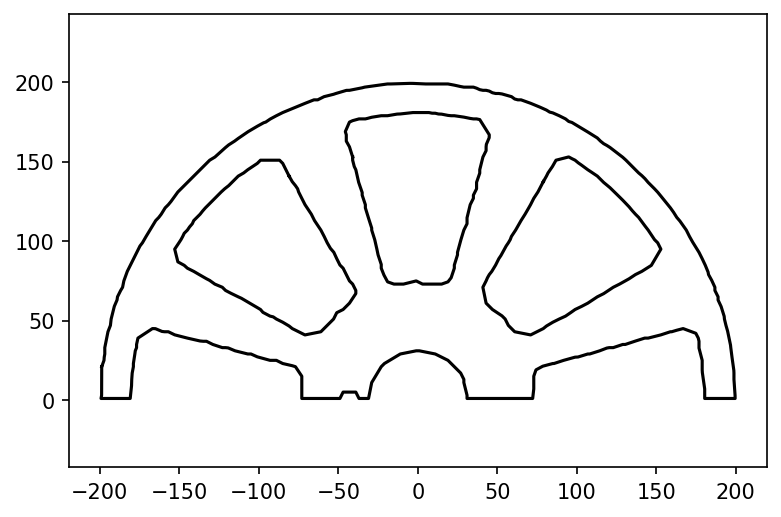

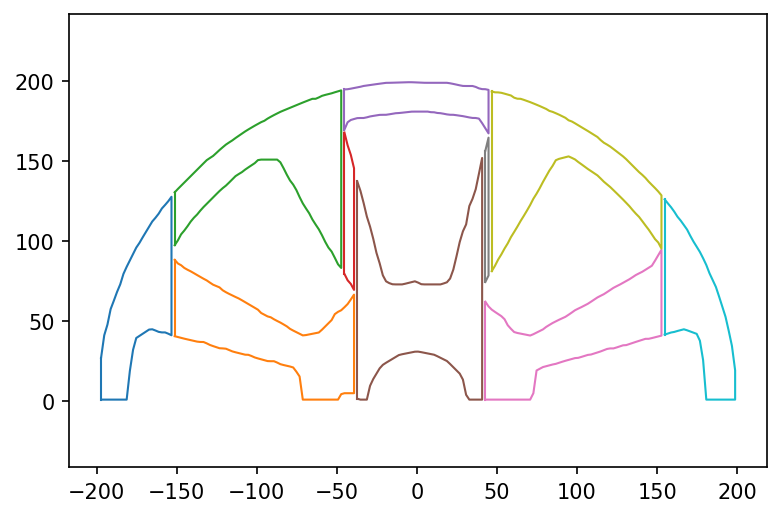

In [10]:
# replace with your own model
pcd = o3d.io.read_point_cloud("Wheel_upper_surface.PLY")
pcd.normalize_normals()
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
        size=100, origin=[0,0,0])
points = np.asarray(pcd.points)
normals = np.asarray(pcd.normals)
new_tri_set = np.load('new_tri_set.npy')

# contour
final_contour = np.load('final_contour.npy',allow_pickle= True)
final_contour = list(final_contour)
points_yz = points[:,:2]
# plt.triplot(points_yz[:,0],points_yz[:,1],new_tri_set)
final_contour_points = []
for i in range(len(final_contour)):
    x = [points_yz[j][0] for j in final_contour[i]]
    y = [points_yz[j][1] for j in final_contour[i]]
    final_contour_points.append([x,y])
    plt.plot(x,y,color = 'k')
plt.axis('equal')
plt.show()

# boundary and spacing between sweeping lines
step = 2
ymin = np.min(points_yz[:,0])
ymax = np.max(points_yz[:,1])
contour_bounds = []
for i in range(len(final_contour_points)):
    contour_bounds.append([np.min(final_contour_points[i][0]),np.max(final_contour_points[i][0]),np.min(final_contour_points[i][1]),np.max(final_contour_points[i][1])])

# Surface Division
new_sets, new_link = MorseD(final_contour_points, contour_bounds, [ymin, ymax], step)

# plot
for i in range(len(new_sets)):
    p = plt.plot(new_sets[i][0]+new_sets[i][0][::-1],new_sets[i][1]+new_sets[i][2][::-1],linewidth = 1)
    color = p[0].get_color()
    plt.plot([new_sets[i][0][0],new_sets[i][0][0]],[new_sets[i][1][0],new_sets[i][2][0]],color = color,linewidth = 1)
plt.axis('equal')
plt.show()


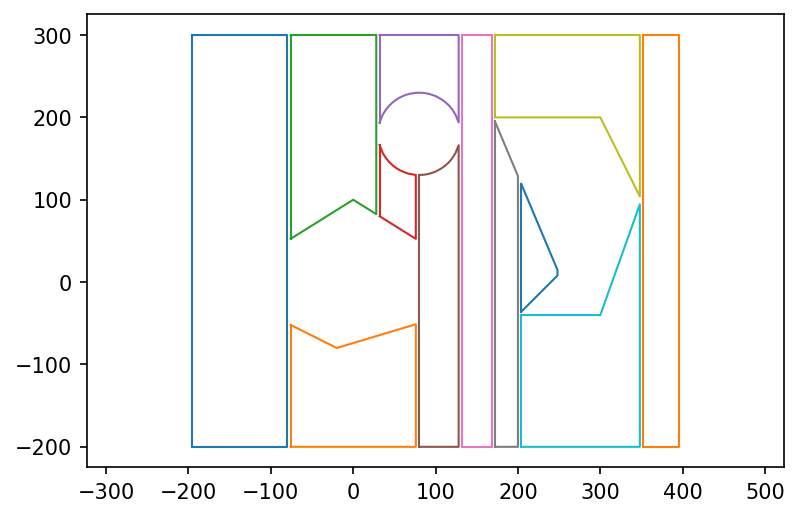

In [11]:
# Another example
final_contour_points = []
qu = [[-200,-200,400,400,-200],[-200,300,300,-200,-200]]
q1 = [[-80,-80,0,80,80,-20,-80],[-50,50,100,50,-50,-80,-50]]
c = [80,180]
angle = np.linspace(0,2*np.pi,50)
r = 50
x = c[0]+r*np.cos(angle)
y = c[1]+r*np.sin(angle)
q2 = [list(x),list(y)]
q3 = [[200,300,350,300,170,250,200],[-40,-40,100,200,200,10,-40]]
final_contour_points = [qu,q1,q2,q3]

# boundary and spacing between sweeping lines
step = 4
ymin = np.min(-200)
ymax = np.max(400)
contour_bounds = []
for i in range(len(final_contour_points)):
    contour_bounds.append([np.min(final_contour_points[i][0]),np.max(final_contour_points[i][0]),np.min(final_contour_points[i][1]),np.max(final_contour_points[i][1])])

# Surface Division
new_sets, new_link = MorseD(final_contour_points, contour_bounds, [ymin, ymax], step)

# plot
for i in range(len(new_sets)):
    p = plt.plot(new_sets[i][0]+new_sets[i][0][::-1],new_sets[i][1]+new_sets[i][2][::-1],linewidth = 1)
    color = p[0].get_color()
    plt.plot([new_sets[i][0][0],new_sets[i][0][0]],[new_sets[i][1][0],new_sets[i][2][0]],color = color,linewidth = 1)
plt.axis('equal')
plt.show()